## лаба 3_3

In [6]:
import matplotlib.pyplot as plt


In [7]:
def LUP_solve(L, U, pi, b, n):
    x = [0 for i in range(n)]
    y = [0 for i in range(n)]

    for i in range(n):
        summ = 0
        for j in range(i):
            summ += L[i][j] * y[j]

        y[i] = b[pi[i]] - summ

    for i in range(n - 1, -1, -1):
        sec_summ = 0
        for j in range(i + 1, n):
            sec_summ += U[i][j] * x[j]

        x[i] = (y[i] - sec_summ) / U[i][i]

    x = [round(x[i], 5) for i in range(len(x))]
    return x


def LUP_decompose(A, n):
    pi = [i for i in range(n)]

    for k in range(n):
        p = 0
        for i in range(k, n):
            if abs(A[i][k]) > p:
                p = abs(A[i][k])
                tmp_k = i
        if p == 0:
            raise MatrixException('Matrix is degenerate')
        pi[k], pi[tmp_k] = pi[tmp_k], pi[k]

        for i in range(n):
            A[k][i], A[tmp_k][i] = A[tmp_k][i], A[k][i]
        for i in range(k + 1, n):
            A[i][k] = A[i][k] / A[k][k]
            for j in range(k + 1, n):
                A[i][j] = A[i][j] - A[i][k] * A[k][j]
    return pi


def get_LU(A):
    n = len(A)
    L = [[0] * n for i in range(0, n)]
    U = [[0] * n for i in range(0, n)]

    for i in range(n):
        L[i][i] = 1
        for j in range(n):
            if j < i:
                L[i][j] = A[i][j]
            else:
                U[i][j] = A[i][j]
    return L, U

In [8]:
def func(x, values):
    return sum([c * (x ** i) for i, c in enumerate(values)])


def sse(f, y):
    return round(sum([(f_i - y_i) ** 2 for f_i, y_i in zip(f, y)]), 5)


def mls(n, x, y):
    matrix = [[] for _ in range(n + 1)]
    size = len(matrix)
    for i in range(n + 1):
        for j in range(n + 1):
            matrix[i].append(sum([x_j ** (i + j) for x_j in x]))

    b = [0 for _ in range(n + 1)]
    for i in range(n + 1):
        b[i] = sum([y_j * (x_j ** i) for x_j, y_j in zip(x, y)])

    P = LUP_decompose(matrix, size)
    L, U = get_LU(matrix)
    new_b = LUP_solve(L, U, P, b, size)
    return [round(i, 5) for i in new_b]


def f_printer(coefs):
    n = len(coefs)
    f = f'F{n - 1}(x) = '
    for i in range(n):
        f += f'{coefs[i]}x^{i} + '
    f = f[:-2]
    return f

Степень = 1
F1(x) = 6.59192x^0 + -3.7283x^1 
Степень = 2
F2(x) = 10.09881x^0 + -14.10744x^1 + 4.71779x^2 


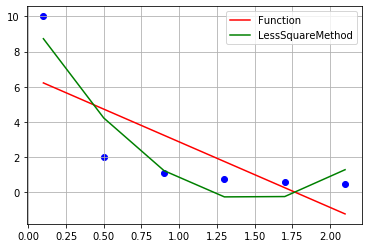

Ошибка F1 = 30.25411
Ошибка F2 = 8.98185


In [9]:
#x = [0.1, 0.5, 0.9, 1.3, 1.7, 2.1]
#y = [-2.3026, 0.69315, -0.10536, 0.26236, 0.53063, 0.74194]
x = [0.1, 0.5, 0.9, 1.3, 1.7, 2.1]
y = [10., 2.0, 1.1111, 0.76923, 0.58824, 0.47619]
F = []
err = []
coefs = []

for degree in [1, 2]:
    print(f'Степень = {degree}')
    coefs.append(mls(degree, x, y))
    print(f_printer(coefs[degree - 1]))
    F.append([func(i, coefs[degree - 1]) for i in x])
    err.append(sse(F[degree - 1], y))

plt.scatter(x, y, color='b')
plt.plot(x, F[0], color='r', label='Function')
plt.plot(x, F[1], color='g', label='LessSquareMethod')
plt.legend(loc='best')
plt.grid()
plt.show()

k = 1
for i in err:
    print(f'Ошибка F{k} = {i}')
    k += 1

## лаба 3_4

In [13]:
def find_interval(x_i, x0):
    for i in range(len(x_i) - 1):
        if x_i[i] <= x0 <= x_i[i + 1]:
            return i


def first_derivative(x_i, y_i, x0):
    i = find_interval(x_i, x0)
    left = (y_i[i + 1] - y_i[i]) / (x_i[i + 1] - x_i[i])
    right = ((y_i[i + 2] - y_i[i + 1]) / (x_i[i + 2] - x_i[i + 1]) - left) / \
            (x_i[i + 2] - x_i[i]) * (2 * x0 - x_i[i] - x_i[i + 1])
    return left + right


def second_derivative(x_i, y_i, x0):
    i = find_interval(x_i, x0)
    left = (y_i[i + 1] - y_i[i]) / (x_i[i + 1] - x_i[i])
    right = 2 * ((y_i[i + 2] - y_i[i + 1]) / (x_i[i + 2] - x_i[i + 1]) - left) / \
            (x_i[i + 2] - x_i[i])
    return right

In [20]:
X = 2.
x_i = [0., 1., 2., 3., 4.]
y_i = [0., 1.0, 1.4142, 1.7321, 2.]
print('X* = ', X, f'\nx_i = {x_i}', f'\ny_i = {y_i}')
print(f'\nПервая производная = {round(first_derivative(x_i, y_i, X), 3)}')
print(f'Вторая производная = {round(second_derivative(x_i, y_i, X), 3)}')


X* =  2.0 
x_i = [0.0, 1.0, 2.0, 3.0, 4.0] 
y_i = [0.0, 1.0, 1.4142, 1.7321, 2.0]

Первая производная = 0.366
Вторая производная = -0.096


## лаба 3_5

In [21]:
import numpy as np

In [22]:
def func(x):
    return x / ((2 * x + 7) * (3 * x + 4))


def get_x(x0, x, step):
    return [i for i in np.arange(x0, x + step, step)]


def get_y(x):
    return [func(i) for i in x]

In [23]:
def rectangle(x, h):
    return h * sum([func((x[i] + x[i + 1]) / 2) for i in range(len(x) - 1)])


def trapeze(x, h):
    y = get_y(x)
    return h * (y[0] / 2 + sum([y[i] for i in range(1, len(y) - 2)]) + y[len(y) - 1] / 2)


def simpson(x, h):
    y = get_y(x)
    return h / 3 * (y[0] +
                    sum([4 * y[i] for i in range(1, len(y) - 1, 2)]) +
                    sum([2 * y[i] for i in range(2, len(y) - 2, 2)]) +
                    y[len(y) - 1])

In [38]:
def runge_Romberg(res, true_value):
    k = res[1]['h'] / res[0]['h']
    val_rec = [res[0]['rec'] + (res[0]['rec'] - res[1]['rec']) / (k ** 2 - 1),
               abs(res[0]['rec'] + (res[0]['rec'] - res[1]['rec']) / (k ** 2 - 1) - true_value)]

    val_trp = [res[0]['trp'] + (res[0]['trp'] - res[1]['trp']) / (k ** 2 - 1),
               abs(res[0]['trp'] + (res[0]['trp'] - res[1]['trp']) / (k ** 2 - 1) - true_value)]

    val_smp = [res[0]['smp'] + (res[0]['smp'] - res[1]['smp']) / (k ** 4 - 1),
               abs(res[0]['smp'] + (res[0]['smp'] - res[1]['smp']) / (k ** 4 - 1) - true_value)]
    
    val_rec, val_trp, val_smp = np.around([val_rec, val_trp, val_smp], 5)
    return {'rec': val_rec, 'trp': val_trp, 'smp': val_smp}

In [41]:
x0 = -1
x = 1
h1, h2 = 0.5, 0.25
true_value = -0.04133027217305138
res = []
for h_i in [h1, h2]:
    print('Шаг h =', h_i)
    X = get_x(x0, x, h_i)
    print(f'x = {X}')
    y = get_y(X)
    print(f'y = {np.around(y, decimals=5)}')

    print('Метод прямоугольников:')
    res_rec = rectangle(X, h_i)
    print(f'Value = {np.around(res_rec, decimals=5)}')

    print('Метода трапеций:')
    res_trp = trapeze(X, h_i)
    print(f'Value = {np.around(res_trp, decimals=5)}')

    print('Метод Симпсона:')
    res_smp = simpson(X, h_i)
    print(f'Value = {np.around(res_smp, decimals=5)}')
    print()

    res.append({"h": h_i,
                "rec": res_rec,
                "trp": res_trp,
                "smp": res_smp})

err = runge_Romberg(res, true_value)

print(f'Значение интеграла: {np.around(true_value, 5)}')
print('Значение методом прямоугольников = {}, погрешность = {}'.format(err['rec'][0], err['rec'][1]))
print('Значение методом трапеций = {}, погрешность = {}'.format(err['trp'][0], err['trp'][1]))
print('Значение методом Симпсона = {}, погрешность = {}'.format(err['smp'][0], err['smp'][1]))

Шаг h = 0.5
x = [-1.0, -0.5, 0.0, 0.5, 1.0]
y = [-0.2     -0.03333  0.       0.01136  0.01587]
Метод прямоугольников:
Value = -0.03431
Метода трапеций:
Value = -0.0627
Метод Симпсона:
Value = -0.04533

Шаг h = 0.25
x = [-1.0, -0.75, -0.5, -0.25, 0.0, 0.25, 0.5, 0.75, 1.0]
y = [-0.2     -0.07792 -0.03333 -0.01183  0.       0.00702  0.01136  0.01412
  0.01587]
Метод прямоугольников:
Value = -0.03924
Метода трапеций:
Value = -0.04919
Метод Симпсона:
Value = -0.04188

Значение интеграла: -0.04133
Значение методом прямоугольников = -0.04089, погрешность = 0.00044
Значение методом трапеций = -0.04469, погрешность = 0.00336
Значение методом Симпсона = -0.04165, погрешность = 0.00032
